# Import các thư viện cần thiết

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Data/BA_Reviews_processed.csv')
df.head()

,OverallRating,ReviewHeader,Name,Datetime,VerifiedReview,ReviewBody,TypeOfTraveller,SeatType,Route,DateFlown,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended,Aircraft,Food&Beverages,InflightEntertainment
0,1.0,"""Service level far worse then Ryanair""",L Keele,2023-11-19,True,4 Hours before takeoff we received a Mail stat...,Couple Leisure,Economy Class,London to Stuttgart,2023-11-23,1.0,1.0,1.0,1.0,no,NaN,3.0,3.0
1,3.0,"""do not upgrade members based on status""",Austin Jones,2023-11-19,True,I recently had a delay on British Airways from...,Business,Economy Class,Brussels to London,2023-11-23,2.0,3.0,1.0,2.0,no,A320,1.0,2.0
2,8.0,"""Flight was smooth and quick""",M A Collie,2023-11-16,False,"Boarded on time, but it took ages to get to th...",Couple Leisure,Business Class,London Heathrow to Dublin,2023-11-23,3.0,3.0,4.0,3.0,yes,A320,4.0,3.0
3,1.0,"""Absolutely hopeless airline""",Nigel Dean,2023-11-16,True,"5 days before the flight, we were advised by B...",Couple Leisure,Economy Class,London to Dublin,2023-12-22,3.0,3.0,1.0,1.0,no,NaN,3.0,3.0
4,1.0,"""Customer Service is non existent""",Gaylynne Simpson,2023-11-14,False,"We traveled to Lisbon for our dream vacation, ...",Couple Leisure,Economy Class,London to Lisbon,2023-11-23,1.0,1.0,1.0,1.0,no,NaN,1.0,1.0


### Biểu đồ 1:
- Tiêu đề: Đóng góp của từng hạng ghế trên tổng các chuyến bay theo từng năm
- Loại biểu đồ: Area Chart
- Lý do chọn: Area Chart là một cách có thể thể hiện sự thay đổi trên tổng thể theo thời gian một cách tốt nhất, chính vì thế sử dụng Area Chart để có thể dễ quan sát sự thay đổi về số lượng các hạng ghế trên tổng thể theo thời gian một cách trực quan hơn.

In [3]:
df['Datetime'] = pd.to_datetime(df['Datetime'])
df['Year']=(df['Datetime']).dt.year
df.head()

,OverallRating,ReviewHeader,Name,Datetime,VerifiedReview,ReviewBody,TypeOfTraveller,SeatType,Route,DateFlown,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended,Aircraft,Food&Beverages,InflightEntertainment,Year
0,1.0,"""Service level far worse then Ryanair""",L Keele,2023-11-19,True,4 Hours before takeoff we received a Mail stat...,Couple Leisure,Economy Class,London to Stuttgart,2023-11-23,1.0,1.0,1.0,1.0,no,NaN,3.0,3.0,2023
1,3.0,"""do not upgrade members based on status""",Austin Jones,2023-11-19,True,I recently had a delay on British Airways from...,Business,Economy Class,Brussels to London,2023-11-23,2.0,3.0,1.0,2.0,no,A320,1.0,2.0,2023
2,8.0,"""Flight was smooth and quick""",M A Collie,2023-11-16,False,"Boarded on time, but it took ages to get to th...",Couple Leisure,Business Class,London Heathrow to Dublin,2023-11-23,3.0,3.0,4.0,3.0,yes,A320,4.0,3.0,2023
3,1.0,"""Absolutely hopeless airline""",Nigel Dean,2023-11-16,True,"5 days before the flight, we were advised by B...",Couple Leisure,Economy Class,London to Dublin,2023-12-22,3.0,3.0,1.0,1.0,no,NaN,3.0,3.0,2023
4,1.0,"""Customer Service is non existent""",Gaylynne Simpson,2023-11-14,False,"We traveled to Lisbon for our dream vacation, ...",Couple Leisure,Economy Class,London to Lisbon,2023-11-23,1.0,1.0,1.0,1.0,no,NaN,1.0,1.0,2023


In [4]:
seattype_df = df.pivot_table(index='Year', columns='SeatType', aggfunc='size', fill_value=0)
seattype_df

SeatType,Business Class,Economy Class,First Class,Premium Economy
Year,,,,
2011,0,1,1,1
2012,4,7,0,1
2014,182,207,26,48
2015,256,347,58,73
2016,153,287,58,72
2017,168,334,22,48
2018,104,165,23,32
2019,101,210,14,31
2020,34,59,3,8


Text(0.5, 1.0, 'Taking Part of SeatTypes Over Time')

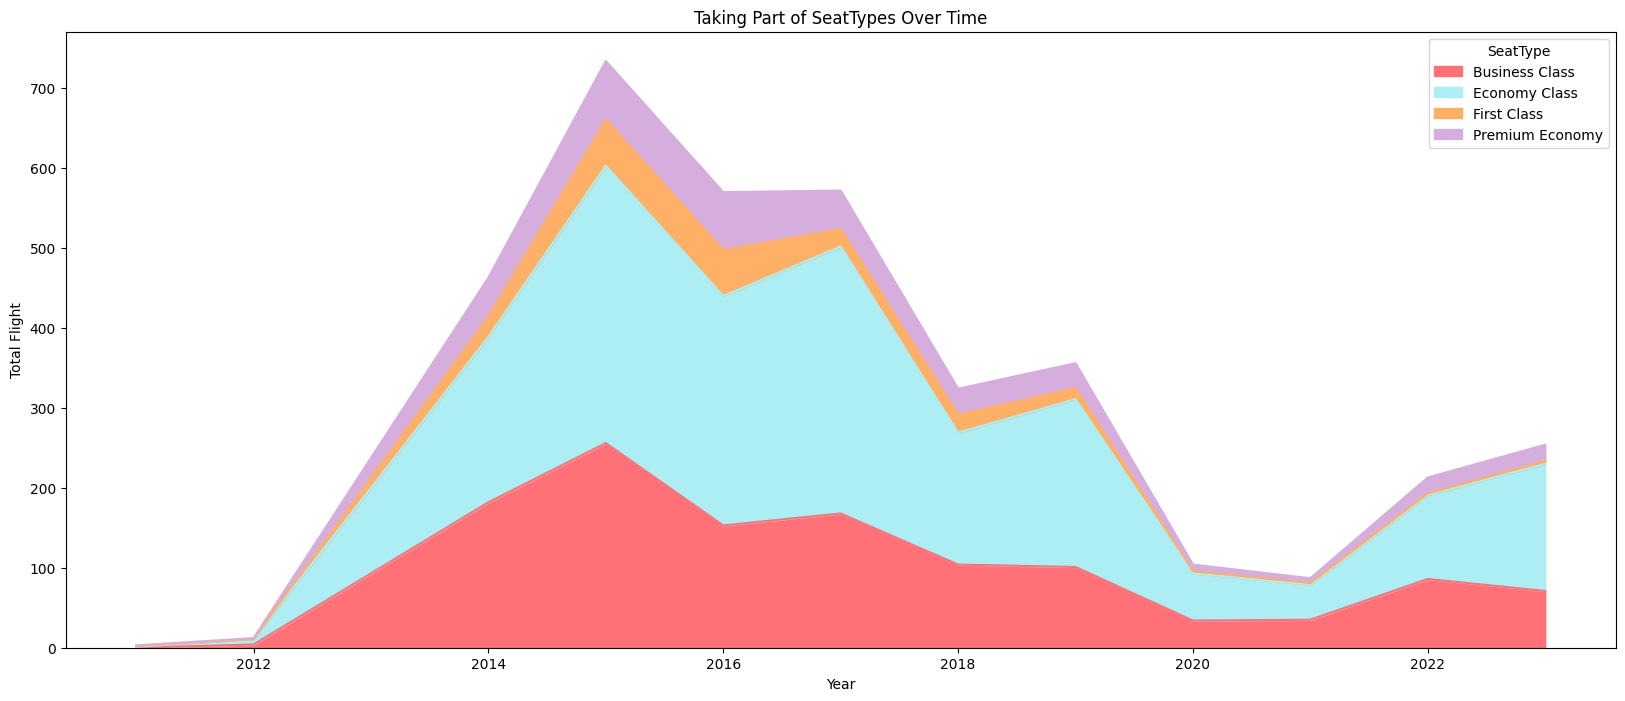

In [27]:
seattype_df.plot.area(color=['#ff7077', '#aceef3', '#ffb067', '#d6aedd'], figsize = (20,8))  
plt.xlabel('Year')
plt.ylabel('Total Flight')
plt.title('Taking Part of SeatTypes Over Time')

#### Nhận xét: 
- Nhìn tổng thể, ta thấy được rằng đóng góp của từng hạng ghế bay trên tổng thể ít khi thay đổi. Hạng ghế chiểm tỉ trọng cao nhất là Economy Class.
- Tổng số lượng chuyển bay tăng mạnh từ năm 2012 đến năm 2014, đạt đỉnh điểm là ở năm 2014, sau đó giảm nhẹ đến năm 2016 và bình ổn đến khoảng 2017.
- Từ sau năm 2017 đến khoảng 2021, số lượng tổng chuyến bay giảm mạnh, đặc biệt là số lượng của Economy Class. Các hạng ghế bay khác vẫn khá bình ổn nếu so với Economy Class
- Từ sau 2021 trở đi, số lượng tổng chuyến bay tăng trở lại, và ghế bay Business Class cũng tăng mạnh hơn so với vài năm trước đó. Số lượng ghế Premium Class cũng tăng nhưng số lượng First Class lại giảm đi đáng kể

### Biếu đồ 2:
- Tiêu đề: Trung bình đánh giá của từng tệp khách hàng trên từng hạng ghế bay
- Loại biểu đồ: Bar Chart
- Lí do chọn: Sử dụng bar chart sẽ có thể trực quan nhất rằng trong từng hạng ghế bay, tệp khách hàng nào sẽ có trải nghiệm tốt nhất và tệp khách hàng nào sẽ có trải nghiệm tệ nhất. Không chỉ vậy, còn có thể dễ dàng so sánh giữa các hạng ghế bay khác nhau

In [6]:
ratingseat_df = df.pivot_table(index='SeatType', columns='TypeOfTraveller',values='OverallRating', aggfunc='mean', fill_value=0)
ratingseat_df

TypeOfTraveller,Business,Couple Leisure,Family Leisure,Solo Leisure
SeatType,,,,
Business Class,3.459649,5.340000,5.697674,5.635359
Economy Class,3.430189,3.801230,3.974359,4.544974
First Class,4.270270,5.951613,4.230769,6.704545
Premium Economy,3.666667,4.210000,3.615385,5.653061


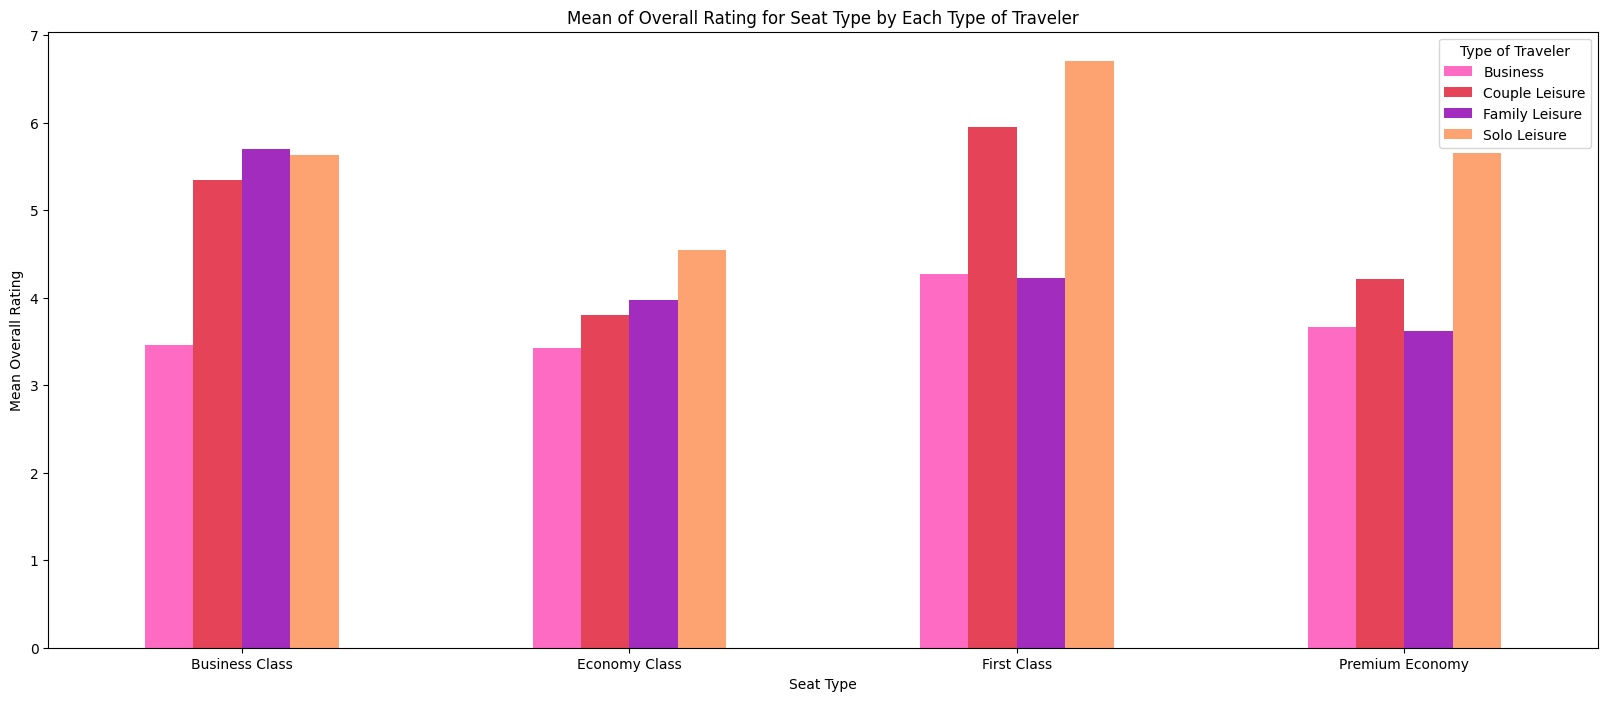

In [28]:
ratingseat_df.plot(kind='bar', figsize=(20, 8), color=['#fd6bc3', '#e44358', '#a22cbd', '#fca371'])
plt.title('Mean of Overall Rating for Seat Type by Each Type of Traveler')
plt.xlabel('Seat Type')
plt.xticks(rotation=0)
plt.ylabel('Mean Overall Rating')
plt.legend(title='Type of Traveler', loc='upper right')

#### Nhận xét:
- Dựa vào biểu đồ, ta có thể thấy đa số các đánh giá của khách hàng khá xấu. Không có hạng ghế bay nào có điểm đánh giá trung bình của tệp khách hàng là trên 7. 
- Ở hạng Business Class, trải nghiệm của tệp khách Business rất thấp so với 3 tệp khách còn lại với trải nghiệm khá tương tự nhau.
- Ở hạng Economy Class có điểm trung binh khá ổn định hơn so với các hạng ghế khác.
- Hạng First Class khiến tệp khách hàng Business và Family Leisure có trải nghiệm khá tệ khi trung bình điểm chỉ ở khoảng 4.
- Còn Premium Class, chỉ có duy nhất tệp Solo Leisure là cho điểm khá cao so với 3 tệp khách hàng còn lại, tuy nhiên chất lượng vẫn không quá đảm bảo khi điểm số chỉ ở tầm 5-6 điểm.